In [ ]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("exp8.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Sex = df.Sex.map({'male': 0, 'female': 1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#selected best 3 features and dropped rest features
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Age'],axis='columns',inplace=True)
df

,Survived,Pclass,Sex,Fare
0,0,3,0,7.2500
1,1,1,1,71.2833
2,1,3,1,7.9250
3,1,1,1,53.1000
4,0,3,0,8.0500
...,...,...,...,...
886,0,2,0,13.0000
887,1,1,1,30.0000
888,0,3,1,23.4500
889,1,1,0,30.0000


In [ ]:
inputs = df.drop('Survived',axis='columns')
inputs

,Pclass,Sex,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500
...,...,...,...
886,2,0,13.0000
887,1,1,30.0000
888,3,1,23.4500
889,1,0,30.0000


In [ ]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
final_inputs = scaler.transform(inputs)

In [ ]:
final_inputs

array([[ 0.82737724, -0.73769513, -0.50244517],
       [-1.56610693,  1.35557354,  0.78684529],
       [ 0.82737724,  1.35557354, -0.48885426],
       ...,
       [ 0.82737724,  1.35557354, -0.17626324],
       [-1.56610693, -0.73769513, -0.04438104],
       [ 0.82737724, -0.73769513, -0.49237783]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(final_inputs)
x=pca.transform(final_inputs)

print("Eigen Vectors =\n",pca.components_)
print("\nEigen Values =\n",pca.explained_variance_)

Eigen Vectors =
 [[-0.65932625  0.333941    0.67362624]
 [-0.28610981 -0.93998137  0.18594676]]

Eigen Values =
 [1.63005311 0.92482132]


In [ ]:
print("Transformed Dataset in 2D")
print(x)

Transformed Dataset in 2D
[[-1.13031844  0.36327089]
 [ 2.01529662 -0.67982399]
 [-0.422135   -1.60183548]
 ...
 [-0.21156549 -1.5437102 ]
 [ 0.75633252  1.13324572]
 [-1.12353681  0.36514288]]


Text(0, 0.5, 'pc2')

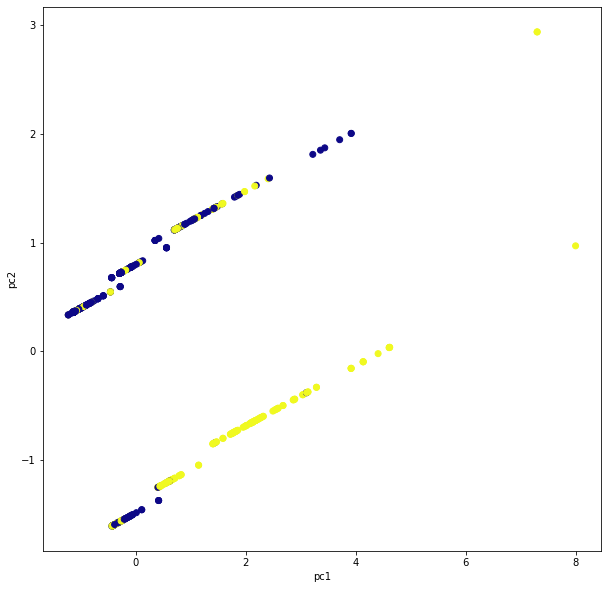

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=target,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [ ]:
pca = PCA(n_components=1)
pca.fit(final_inputs)
y=pca.transform(final_inputs)

print("Eigen Vectors =\n",pca.components_)
print("\nEigen Values =\n",pca.explained_variance_)

Eigen Vectors =
 [[-0.65932625  0.333941    0.67362624]]

Eigen Values =
 [1.63005311]


In [ ]:
print("Transformed Dataset in 1D")
print(y)

Transformed Dataset in 1D
[[-1.13031844e+00]
 [ 2.01529662e+00]
 [-4.22135000e-01]
 [ 1.76867192e+00]
 [-1.11946783e+00]
 [-1.11392996e+00]
 [ 1.05285915e+00]
 [-9.42806456e-01]
 [-3.78620014e-01]
 [ 6.67277569e-01]
 [-3.03117450e-01]
 [ 1.40856754e+00]
 [-1.11946783e+00]
 [-8.04461270e-01]
 [-4.23095278e-01]
 [ 4.76431741e-01]
 [-8.33622265e-01]
 [-2.63286259e-01]
 [-2.85485221e-01]
 [-4.31629277e-01]
 [-8.69639631e-02]
 [-2.63286259e-01]
 [-4.20721709e-01]
 [ 8.30930414e-01]
 [-2.43778216e-01]
 [-1.03907164e-01]
 [-1.13065752e+00]
 [ 3.91657059e+00]
 [-4.22756197e-01]
 [-1.12155929e+00]
 [ 7.25419153e-01]
 [ 3.03576191e+00]
 [-4.24508569e-01]
 [-2.97194393e-01]
 [ 1.46393831e+00]
 [ 1.05472410e+00]
 [-1.13060055e+00]
 [-1.11946783e+00]
 [-2.85485221e-01]
 [-3.77149757e-01]
 [-4.01111957e-01]
 [ 5.44248009e-01]
 [-1.12155929e+00]
 [ 8.23368916e-01]
 [-4.22756197e-01]
 [-1.11946783e+00]
 [-1.01842159e+00]
 [-4.24508569e-01]
 [-9.34611538e-01]
 [-2.88197871e-01]
 [-6.90360399e-01]
 [-1.

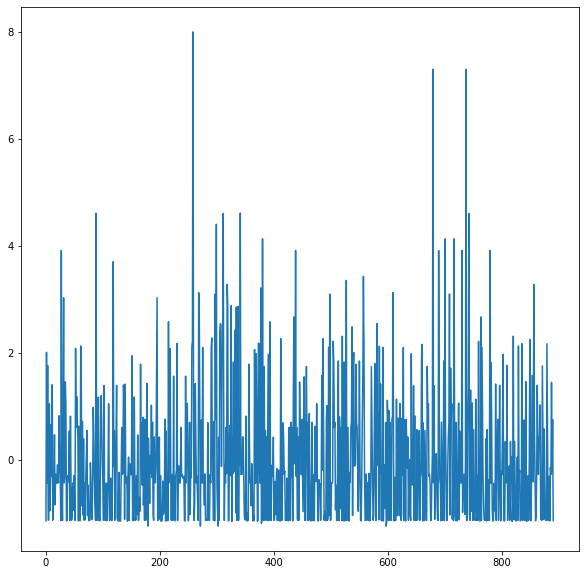

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y)

In [ ]:
#function to split the dataset
from sklearn.model_selection import train_test_split
def split_df(inputs,target,ts):
  X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=ts)
  return X_train, X_test, y_train, y_test

In [ ]:
#function to find accuracy
from sklearn.linear_model import LogisticRegression
def accuracy(X_train, X_test, y_train, y_test):
  logisticRegr = LogisticRegression()
  logisticRegr.fit(X_train, y_train)
  score = logisticRegr.score(X_test, y_test)
  return score

In [ ]:
#converting 2D array to dataframe
numpy_array_x = np.array(x)
df_x = pd.DataFrame(numpy_array_x)
df_x.head()

,0,1
0,-1.130318,0.363271
1,2.015297,-0.679824
2,-0.422135,-1.601835
3,1.768672,-0.747902
4,-1.119468,0.366266


In [ ]:
#converting 1D array to dataframe
numpy_array_y = np.array(y)
df_y = pd.DataFrame(numpy_array_y)
df_y.head()

,0
0,-1.130318
1,2.015297
2,-0.422135
3,1.768672
4,-1.119468


In [ ]:
#original data
X_train, X_test, y_train, y_test = split_df(inputs,target,0.3)
acc_1 = accuracy(X_train, X_test, y_train, y_test)

In [ ]:
#2D data
X_train, X_test, y_train, y_test = split_df(df_x,target,0.3)
acc_2 = accuracy(X_train, X_test, y_train, y_test)

In [ ]:
#1D data
X_train, X_test, y_train, y_test = split_df(df_y,target,0.3)
acc_3 = accuracy(X_train, X_test, y_train, y_test)

In [ ]:
print("Original Dataset Accuracy:",acc_1)
print("2D Dataset Accuracy:",acc_2)
print("1D Dataset Accuracy:",acc_3)

Original Dataset Accuracy: 0.7611940298507462
2D Dataset Accuracy: 0.8171641791044776
1D Dataset Accuracy: 0.7238805970149254
